In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/niraj2/all.csv


In [2]:
df = pd.read_csv("/kaggle/input/niraj2/all.csv")
df.shape

(48701, 2)

# Data Analysis & Feature Engineering

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

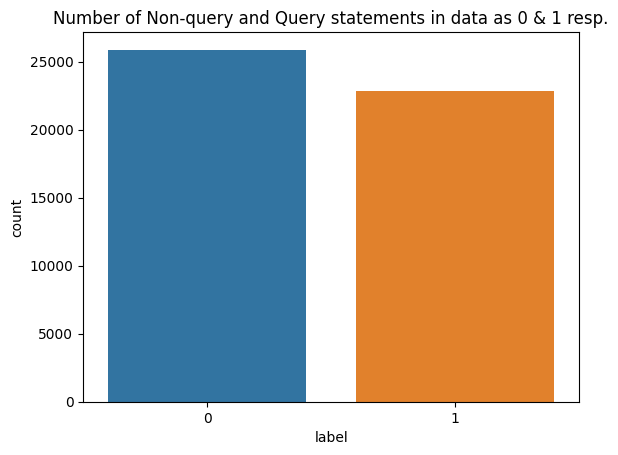

label
0    25886
1    22815
Name: count, dtype: int64


In [5]:
sns.countplot(data=df, x="label")
plt.title("Number of Non-query and Query statements in data as 0 & 1 resp.")
plt.show()
print(df["label"].value_counts())

  # few random Question statements from dataset

In [6]:
import random
for i in range(10):
    df_tmp = df[df["label"]==1]
    df_tmp = df_tmp.reset_index()
    ind = random.randint(0,df_tmp.shape[0])
    print(df_tmp.loc[ind,"msg"])

mn biggner hu koi mujha batia mn 1st kiya seekhu mn c plus plus seek rahi hu
ai is in hype and probably will die in 2 years what s the future tech so that i can get started from now
how to fine tune the llm
 can you explain what is a matrix? 
 i am gonna start college in a little while how should i start coding? 
 i have no clue whats going on here 
 how unlabeled data is stored? 
 i m in big4 but want remote offer have experience in c sharp react should i start js? or i can get remote job in c sharp as well 
should be user1 user2
 1 100 start after 3 month? 


  # few random non-Question statements from dataset

In [7]:
import random
for i in range(10):
    df_tmp = df[df["label"]==0]
    df_tmp = df_tmp.reset_index()
    ind = random.randint(0,df_tmp.shape[0])
    print(df_tmp.loc[ind,"msg"])

 sir set index nhi daliya toa solve ho jaya ga first sa 
 thanks kyle your doing great moderating and hosting 
 at mahi music yes you should know html css and basic of javascript should be clear to you 
 sir is on legendary level to write any code 
 yeah very helpful 
 freeze hai bhai 
 class mai program thik hai sir 
 minimum of 3 
 test bol bol k checkmate krna hai face with tears of joy 
 a 351 result a and 100 (a and 10) percent10 a percent10 print(result) 


**feature engineering**

In [8]:
def uniq_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["msg"].split()))
    return len(w1)

In [9]:
df.loc[:,'s_len'] = df['msg'].str.len() 
df.loc[:,'total_words'] = df['msg'].apply(lambda row: len(row.strip().split()))
df.loc[:,'uniq_word'] = df.apply(uniq_words, axis=1)

In [10]:
line = """what,when,why,who,whom,which,whose,where,how,ky,kya,
,kyaa,kab,kb,kyo,kyon,kyu,kyun,kyoki,kaun,kon,kisko,kiska,kaunsa,
,konsa,kaha,kahan,kaise,kitna,kitne,kese,kiya,kia,kyse,kis,kisn,
,kidhr,kiski,kita,kitni,kh,konsi"""

# Split the string and strip whitespace from each word
q_words = [word.strip() for word in line.split(",")]

print(q_words)

['what', 'when', 'why', 'who', 'whom', 'which', 'whose', 'where', 'how', 'ky', 'kya', '', 'kyaa', 'kab', 'kb', 'kyo', 'kyon', 'kyu', 'kyun', 'kyoki', 'kaun', 'kon', 'kisko', 'kiska', 'kaunsa', '', 'konsa', 'kaha', 'kahan', 'kaise', 'kitna', 'kitne', 'kese', 'kiya', 'kia', 'kyse', 'kis', 'kisn', '', 'kidhr', 'kiski', 'kita', 'kitni', 'kh', 'konsi']


In [11]:
def features(row):
    ans = [0.0]*2
    text = row["msg"].strip()
    words = text.split()
    
    ans[0] = len(text)/len(words)
    if "?" in text or len(set(words) & set(q_words)):
        ans[1] = 1
    else:
        ans[1] = 0
        
    return ans

features_val = df.apply(features, axis=1)

In [12]:
df.loc[:,"avg_len"] = list(map(lambda x:x[0], features_val))
df.loc[:,"q_words"] = list(map(lambda x:x[1], features_val))

In [13]:
df

,msg,label,s_len,total_words,uniq_word,avg_len,q_words
0,agar child class mein constructor hain tho pa...,0,86,14,13,6.000000,0
1,agar ambani hai to static kardo,0,33,6,6,5.166667,0
2,agar same class,0,17,3,3,5.000000,0
3,agar values 1 se jyada ho to,0,30,7,7,4.000000,0
4,ankit is sir s bestfrnd,0,25,5,5,4.600000,0
...,...,...,...,...,...,...,...
48696,since month i get no answers i am a scientist...,1,148,27,25,5.407407,1
48697,any information on blood types and their seve...,1,64,11,11,5.636364,1
48698,what is that last drug mentioned?,1,35,6,6,5.500000,1
48699,any comment on the chinese study published in...,1,198,30,29,6.533333,1


In [14]:
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
warnings.filterwarnings("ignore", category=FutureWarning, message='mode.use_inf_as_na')


In [15]:
df.columns

Index(['msg', 'label', 's_len', 'total_words', 'uniq_word', 'avg_len',
       'q_words'],
      dtype='object')

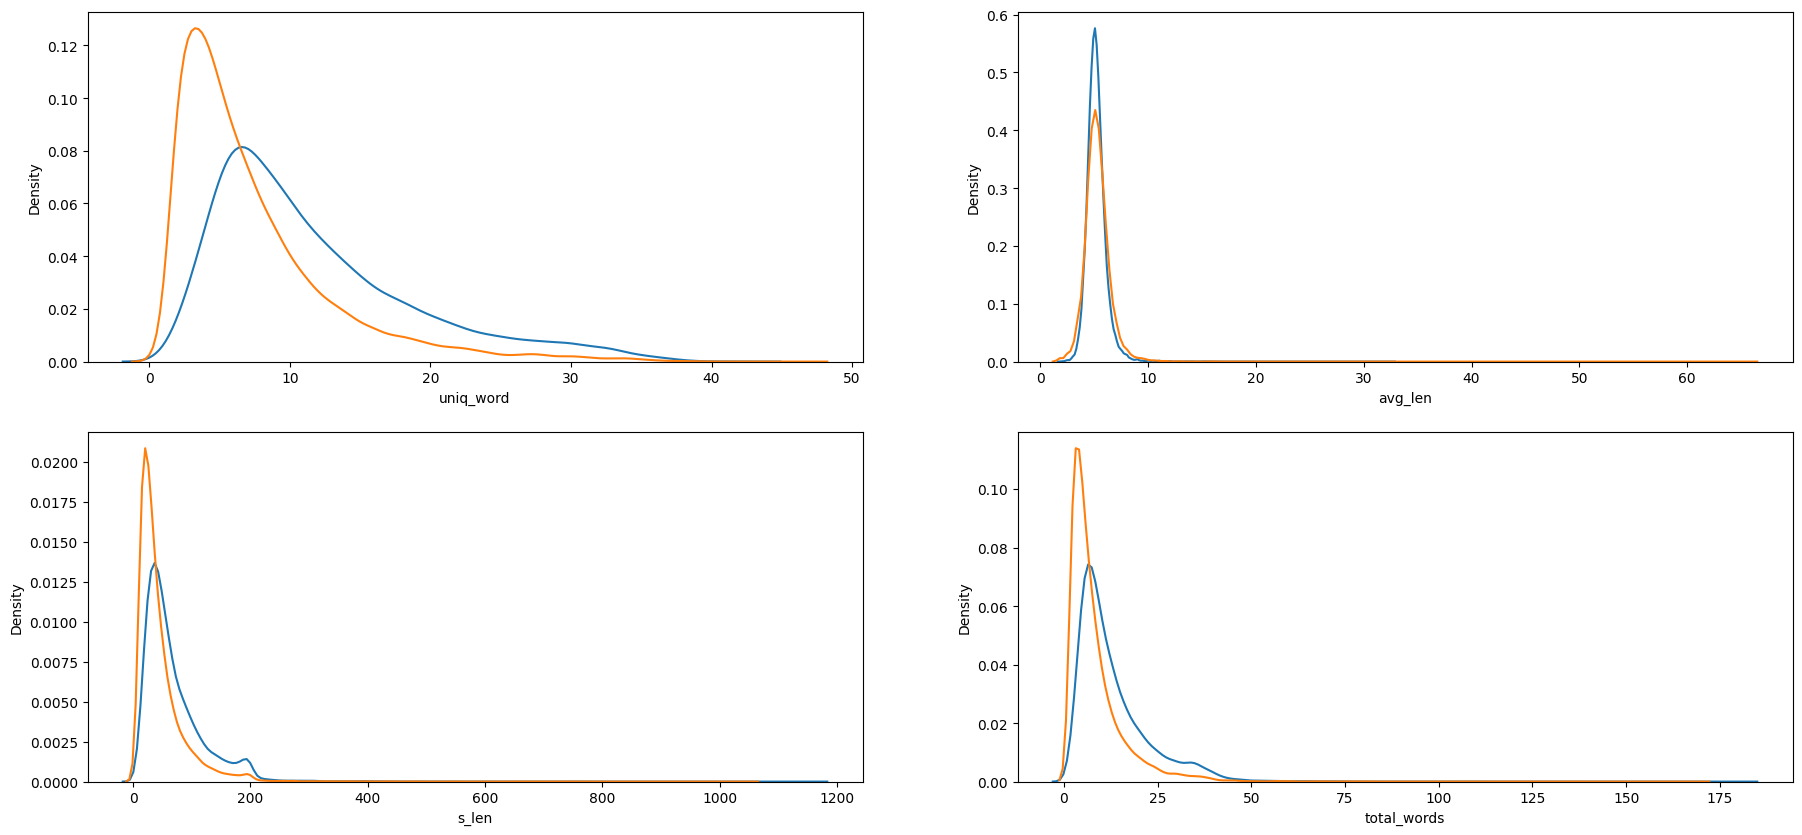

In [16]:
fig, ax = plt.subplots(2,2,figsize=(22,10))

sns.kdeplot(data=df[df["label"]==1], x="uniq_word", ax=ax[0,0])  #blue = (label 1) i.e query statements
sns.kdeplot(data=df[df["label"]==0], x="uniq_word", ax=ax[0,0])  #orange = (label 0) i.e non query statements

sns.kdeplot(data=df[df["label"]==1], x="avg_len", ax=ax[0,1])
sns.kdeplot(data=df[df["label"]==0], x="avg_len", ax=ax[0,1])

sns.kdeplot(data=df[df["label"]==1], x="s_len", ax=ax[1,0])
sns.kdeplot(data=df[df["label"]==0], x="s_len", ax=ax[1,0])

sns.kdeplot(data=df[df["label"]==1], x="total_words", ax=ax[1,1])
sns.kdeplot(data=df[df["label"]==0], x="total_words", ax=ax[1,1])


plt.show()

<Axes: xlabel='label', ylabel='uniq_word'>

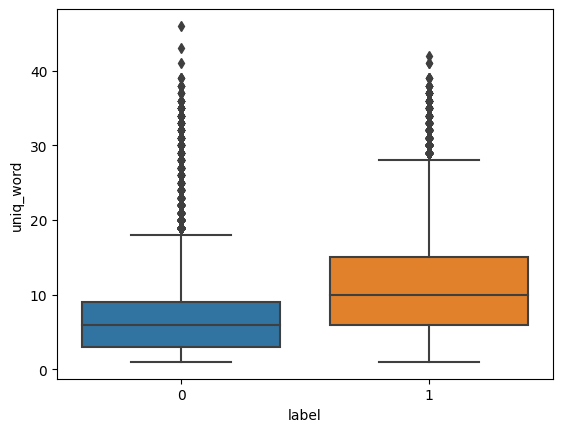

In [18]:
sns.boxplot(data=df,x="label", y="uniq_word")

In [19]:
print(df[(df["label"]==1) & (df["q_words"]==0)].shape)
print(df[(df["label"]==1) & (df["q_words"]==1)].shape)

(3427, 7)
(19388, 7)


In [20]:
print(df[(df["label"]==0) & (df["q_words"]==0)].shape)
print(df[(df["label"]==0) & (df["q_words"]==1)].shape)

(25884, 7)
(2, 7)


# Bag of words only

In [21]:
X = df.drop(columns = ["label"])
y = df.loc[:,"label"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape,X_test.shape)

(38960, 6) (9741, 6)


In [27]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

msgs = list(X_train["msg"])
cv = CountVectorizer(max_features = 3500)
cv.fit(msgs)

CountVectorizer(max_features=3500)

In [26]:
msg_train = cv.transform(X_train["msg"]).toarray()
msg_test = cv.transform(X_test["msg"]).toarray()

In [28]:
temp_df = pd.DataFrame(msg_train)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([temp_df,X_train],axis=1)

In [29]:
temp_df = pd.DataFrame(msg_test)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([temp_df,X_test],axis=1)

In [30]:
X_train.drop(columns=["msg"],inplace=True)
X_test.drop(columns=["msg"],inplace=True)

In [32]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test,y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

# Display results for each class
for i, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
    print(f"Class {i}:")
    print(f"  Precision: {p:.2f}")
    print(f"  Recall: {r:.2f}")
    print(f"  F1-Score: {f:.2f}")
    print(f"  Support: {s}")
print(f"\nOverall Accuracy: {accuracy:.2f}")

Class 0:
  Precision: 0.96
  Recall: 0.98
  F1-Score: 0.97
  Support: 5130
Class 1:
  Precision: 0.98
  Recall: 0.96
  F1-Score: 0.97
  Support: 4611

Overall Accuracy: 0.97


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[5041,   89],
       [ 197, 4414]])

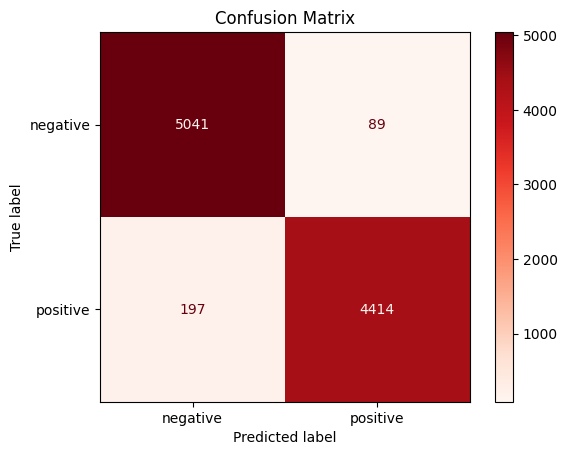

In [40]:
import matplotlib.pyplot as plt
cm =  confusion_matrix(y_test, y_pred)
# Plot confusion matrix using ConfusionMatrixDisplay from scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative',"positive"])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_train1 = pd.DataFrame(y_train)
y_train1.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
df_train = pd.concat([X_train,y_train1],axis=1)
print(df_train.shape)

In [ ]:
y_test1 = pd.DataFrame(y_test)
y_test1.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
df_test = pd.concat([X_test,y_test1],axis=1)
print(df_test.shape)

In [ ]:
df_test1 = df_test[(df_test["label"]==0) & (df_test["q_words"]==0)]
df_test1.shape

In [ ]:
X_test2 = df_test1.drop(columns=["label"])
y_test2 = df_test1.loc[:,"label"]

In [ ]:
X_test2.columns = X_test2.columns.astype(str)
y_pred2 = xgb_model.predict(X_test2)
accuracy_score(y_test2,y_pred2)

In [ ]:
df_test = df_test[(df_test["label"]==1) & (df_test["q_words"]==0)]

# Using TFIDF

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [43]:
msgs = list(X_train["msg"])

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df = 3,
    max_features = 3500,
    strip_accents = "unicode",
    analyzer = "word",
    token_pattern = r"\w{1,}",
    ngram_range = (1,2),
    use_idf = 1,
    smooth_idf = 1,
    sublinear_tf=1
)

tfidf.fit(msgs)
msg_train = tfidf.transform(X_train["msg"]).toarray()
msg_test = tfidf.transform(X_test["msg"]).toarray()

print(msg_train.shape, msg_test.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


(38960, 3500) (9741, 3500)


In [45]:
print(X_train.shape, X_test.shape)
temp_df1 = pd.DataFrame(msg_train)
X_train.reset_index(inplace=True, drop=True)
X_train = pd.concat([temp_df1, X_train], axis=1)

temp_df2 = pd.DataFrame(msg_test)
X_test.reset_index(inplace=True, drop=True)
X_test = pd.concat([temp_df2,X_test], axis=1)
print(X_train.shape, X_test.shape)

(38960, 6) (9741, 6)
(38960, 3506) (9741, 3506)


In [46]:
print(X_train.shape,X_test.shape)
X_train.drop(columns=["msg"], inplace=True)
X_test.drop(columns=["msg"], inplace=True)
print(X_train.shape,X_test.shape)

(38960, 3506) (9741, 3506)
(38960, 3505) (9741, 3505)


In [47]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test,y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

# Display results for each class
for i, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
    print(f"Class {i}:")
    print(f"  Precision: {p:.2f}")
    print(f"  Recall: {r:.2f}")
    print(f"  F1-Score: {f:.2f}")
    print(f"  Support: {s}")
print(f"\nOverall Accuracy: {accuracy:.2f}")

Class 0:
  Precision: 0.97
  Recall: 0.99
  F1-Score: 0.98
  Support: 5161
Class 1:
  Precision: 0.99
  Recall: 0.97
  F1-Score: 0.98
  Support: 4580

Overall Accuracy: 0.98


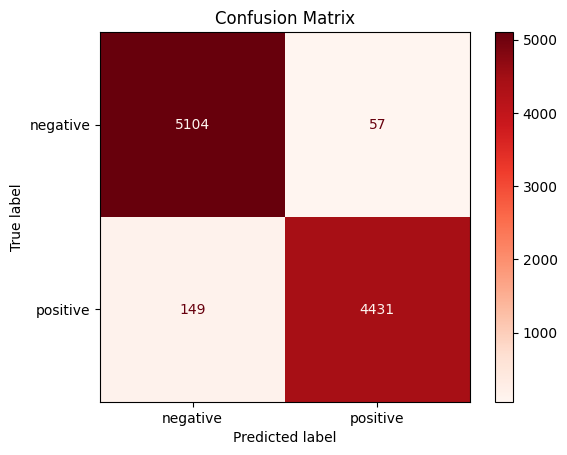

In [49]:
cm =  confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative',"positive"])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [50]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test,y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

# Display results for each class
for i, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
    print(f"Class {i}:")
    print(f"  Precision: {p:.2f}")
    print(f"  Recall: {r:.2f}")
    print(f"  F1-Score: {f:.2f}")
    print(f"  Support: {s}")
print(f"\nOverall Accuracy: {accuracy:.2f}")

Class 0:
  Precision: 0.97
  Recall: 0.98
  F1-Score: 0.98
  Support: 5161
Class 1:
  Precision: 0.98
  Recall: 0.97
  F1-Score: 0.98
  Support: 4580

Overall Accuracy: 0.98


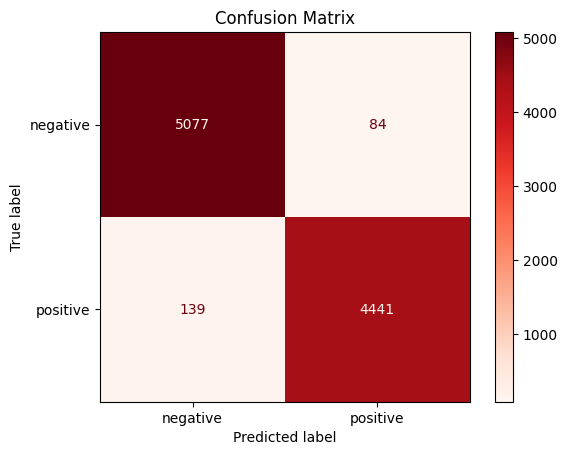

In [52]:
cm =  confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative',"positive"])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

# Using Word2Vec

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api 

model = api.load("word2vec-google-news-300")

[--------------------------------------------------] 1.9% 32.0/1662.8MB downloaded

In [ ]:
from nltk.tokenize import word_tokenize
# Function to transform a text into a vector
def text_to_vector(text,model):
    words = word_tokenize(text.lower())
    words =  [word for word in words if word.isalpha()]
    
    word_vectors = []
    for word in words:
        if word in model:
            word_vectors.append(model[word])
    
    if not word_vectors:
        return np.zeros(model.vector_size)
    
    v = np.sum(word_vectors, axis=0)
    return v/np.sqrt((v**2).sum())
    

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
msg_train = X_train["msg"].apply(lambda x: text_to_vector(x,model))
msg_test = X_test["msg"].apply(lambda x: text_to_vector(x,model))

In [ ]:
msg_train.reset_index(inplace=True, drop=True)
msg_test.reset_index(inplace=True, drop=True)

In [ ]:
type(msg_train)

In [ ]:
# Convert Series to 2D numpy arrays
msg_train = np.vstack(msg_train.values)
msg_test = np.vstack(msg_test.values)

# # Concatenate along the second axis
# q_train = np.concatenate([q1_train_array, q2_train_array], axis=1)
# q_test = np.concatenate([q1_test_array, q2_test_array], axis=1)

# Check the shapes
print("Shape of combined training vectors:", msg_train.shape)
print("Shape of combined training vectors:", msg_test.shape)

In [ ]:
temp_df1 = pd.DataFrame(msg_train)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([temp_df1, X_train], axis=1)

temp_df2 = pd.DataFrame(msg_test)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([temp_df2, X_test], axis=1)

print(X_train.shape, X_test.shape)

In [ ]:
X_train.drop(columns=["msg"], inplace=True)
X_test.drop(columns=["msg"], inplace=True)
print(X_train.shape, X_test.shape)

**if feature name duplicate error**

In [ ]:
X_train.columns = [f"feature_{i}" for i in range(X_train.shape[1])]
X_test.columns = X_train.columns

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

# Display results for each class
for i, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
    print(f"Class {i}:")
    print(f"  Precision: {p:.2f}")
    print(f"  Recall: {r:.2f}")
    print(f"  F1-Score: {f:.2f}")
    print(f"  Support: {s}")
print(f"\nOverall Accuracy: {accuracy:.2f}")

In [ ]:
cm =  confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative',"positive"])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
///// only Word2Vec + Xgboost = 95.11 %
///// Word2Vec + TF-IDF +Xgboost  = 97.72 % lesser than tfidf only
///// Bag of words +Xgboost = 97%
///// TFIDF + Xgboost = 98%